## **Task 1: Prediction using Supervised ML**


### **Problem Statement**
Predict the percentage of a student based on the no. of study. What will be the predicted score if a student studies for 9.25 hrs per day?




### **Author: Shivani Rajhance.**




Dataset: "http://bit.ly/w-data"

Importing the libraries


In [ ]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Importing the required Dataset

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Visualizing the dataset to get better understanding between the two parameters

Data Visualized Successful


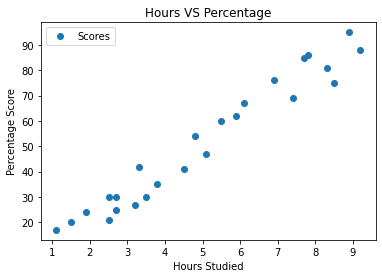

In [ ]:
#Plotting of graph to give the relation between hours & percentage
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours VS Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
print("Data Visualized Successful")  
plt.show()

Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
x = s_data.iloc[:, :-1].values  #independent values/variables
y = s_data.iloc[:, 1].values  #dependent values/variables

Splitting of Data into traing & test datasets

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
print("Splitted the data successfully\n\n")


print('Training Dataset')
print('Hours={} \n Percentage={}'.format(x_train.reshape(1,-1),y_train))
print('\nTesting Dataset')
print('Hours={} \n Percentage={}'.format(x_test.reshape(1,-1),y_test))

Splitted the data successfully


Training Dataset
Hours=[[3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
  8.9 4.5]] 
 Percentage=[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]

Testing Dataset
Hours=[[1.5 3.2 7.4 2.5 5.9]] 
 Percentage=[20 27 69 30 62]


###**The Algorithm training**
Algorithm is Linear Regression. Training data for training the model & test data for predictions.

In [ ]:
from sklearn.linear_model import LinearRegression  
r = LinearRegression()  
r.fit(X_train, y_train) 
print("Coefficients: ",r.coef_)
print("Intercepts: ",r.intercept_)
print("Training complete.")

Coefficients:  [9.91065648]
Intercepts:  2.018160041434662
Training complete.


### **Plotting the Regression line using y=mx+c**
y=line required
m=r.coef
x=independent variable(hours)
c=r.intercept


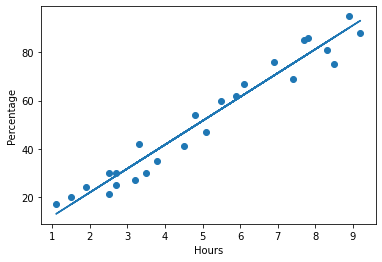

In [ ]:
# Plotting the regression line
line = r.coef_*x+r.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

### **Score Predictions**
Test Data is used for prediction

In [ ]:
#print(x_test)
y_pred = r.predict(x_test) # Predicting the scores

Comparison of Actual & Predicted values


In [ ]:
# Comparing Actual vs Predicted
pred= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred["Difference"]=pred["Actual"]-pred["Predicted"]
pred

,Actual,Predicted,Difference
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


Predicting the score if the student studies for 9.25 hours per day

In [ ]:
# You can also test with your own data
hours = np.array([[9.25]])
own_pred = r.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score for 9.25 hours = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score for 9.25 hours = 93.69173248737539


### **Evaluating the model**

Checking the accuracy of the model. Mean absolute error, R2 score & Residual sum of squares are calculated.

In [ ]:
#Accuracy
from sklearn import metrics  
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

#R2 Score 
from sklearn.metrics import r2_score
print("The R2 Score: {}".format(r2_score(y_pred,y_test)))

#Residual sum of squares
ss=np.sum(np.square(y_pred-y_test))
print("The Residual Sum of Squares: {}".format(ss))

Mean Absolute Error:  4.183859899002982
The R2 Score: 0.9546785947197246
The Residual Sum of Squares: 107.99384653608728
